In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
face_detector_path = "/Users/kevin.staunton-lambert/workspace/github_kevleyski/opencv/data/haarcascades/haarcascade_frontalface_default.xml"

In [18]:
img = cv2.imread("/Users/kevin.staunton-lambert/vids/kev_face_640x480.jpg")

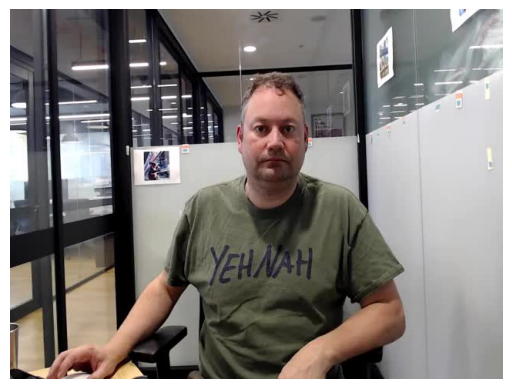

In [19]:
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [20]:
base_img = img.copy()

In [21]:
def blur_img(img, factor = 20):

    kW = int(img.shape[1] / factor)
    kH = int(img.shape[0] / factor)

    #ensure the shape of the kernel is odd
    if kW % 2 == 0: kW = kW - 1
    if kH % 2 == 0: kH = kH - 1
    
    blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
    return blurred_img

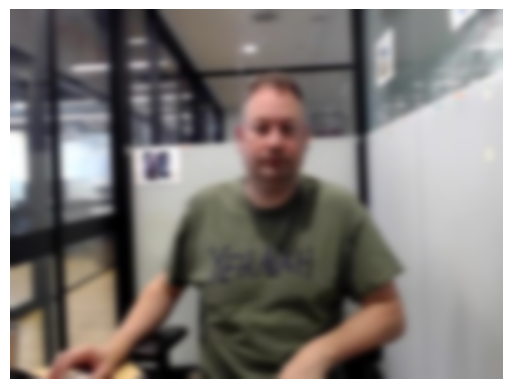

In [22]:
blurred_img = blur_img(img, factor = 20)
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

In [23]:
face_detector = cv2.CascadeClassifier(face_detector_path)

In [24]:
faces = face_detector.detectMultiScale(img, 1.3, 5)

In [25]:
for x, y, w, h in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    detected_face_blurred = blur_img(detected_face, factor = 3)
    
    #plt.imshow(detected_face[:,:,::-1])
    
    blurred_img[y:y+h, x:x+w] = detected_face
    base_img[y:y+h, x:x+w] = detected_face_blurred

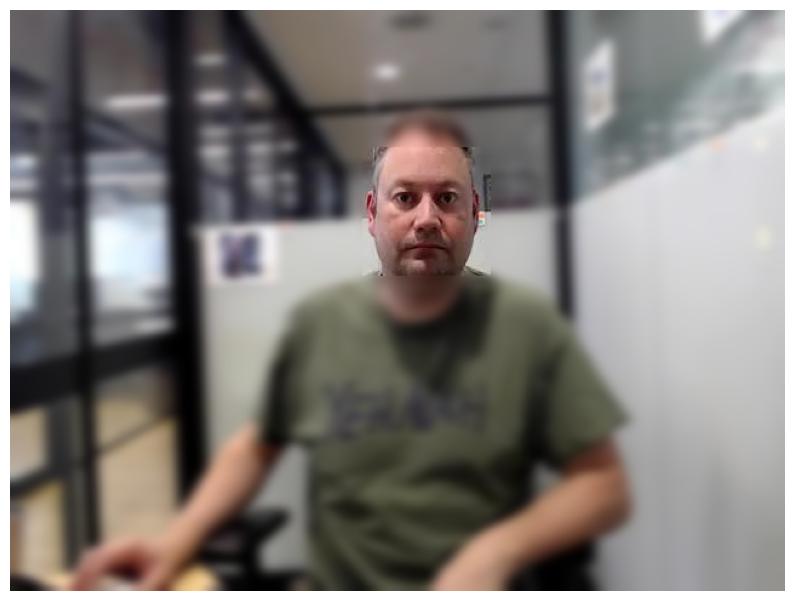

In [26]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(blurred_img[:,:,::-1])

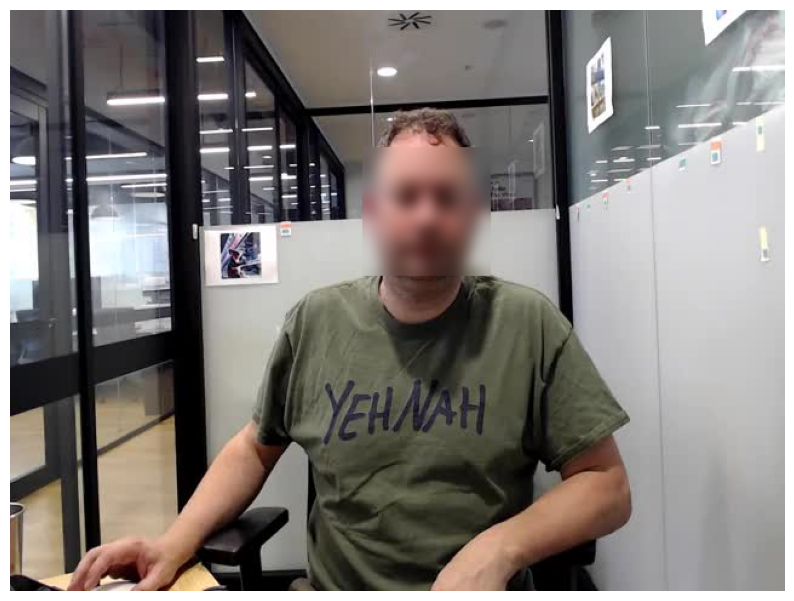

In [27]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(base_img[:,:,::-1])

# pixelated face blur

In [28]:
pixelated_face = detected_face.copy()

In [29]:
width = pixelated_face.shape[0]
height = pixelated_face.shape[1]

In [30]:
step_size = 80

In [31]:
def extract_indexes(length, step_size):
    
    indexes = []
    
    cycles = int(length / step_size)

    for i in range(cycles):
        begin = i * step_size; end = i * step_size+step_size
        #print(i, ". [",begin,", ",end,")")
        
        index = []
        index.append(begin)
        index.append(end)
        indexes.append(index)

        if begin >= length: break
        if end > length: end = length

    if end < length:
        #print(i+1,". [", end,", ",length,")")
        index = []
        index.append(end)
        index.append(length)
        indexes.append(index)
    
    return indexes

In [32]:
for wi in extract_indexes(width, step_size):
    for hi in extract_indexes(height, step_size):
        detected_face_area = detected_face[wi[0]:wi[1], hi[0]:hi[1]]
        
        if detected_face_area.shape[0] > 0 and detected_face_area.shape[1] > 0:
            detected_face_area = blur_img(detected_face_area, factor = 0.5)
            pixelated_face[wi[0]:wi[1], hi[0]:hi[1]] = detected_face_area
            

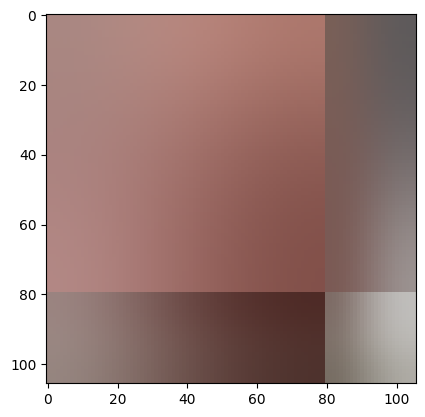

In [33]:
plt.imshow(pixelated_face[:,:,::-1])

In [34]:
base_img = img.copy()

In [35]:
base_img[y:y+h, x:x+w] = pixelated_face

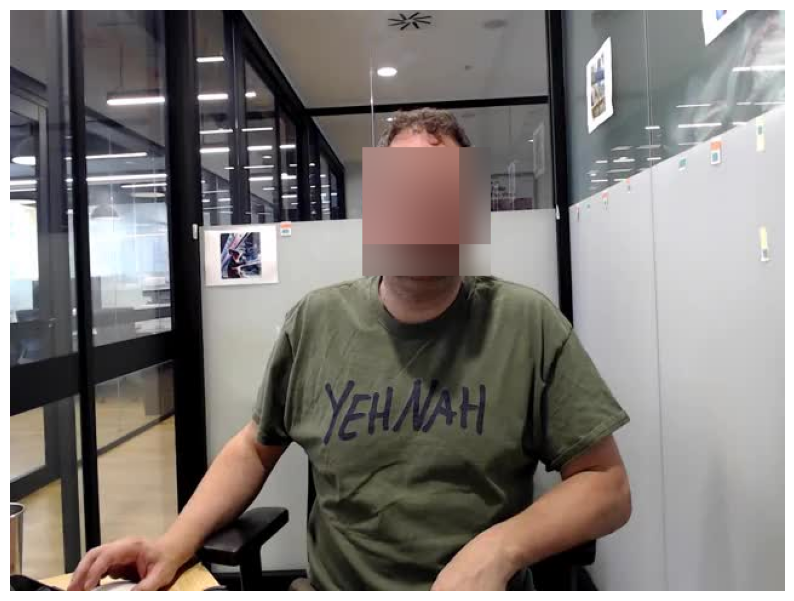

In [36]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(base_img[:,:,::-1])